In [ ]:
import sys
import time
import numpy as np
import pandas as pd
import pickle
from sklearn import model_selection, svm, preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import auc
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from matplotlib import style
import collections
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

**Dataset** : Fashion MNIST

> 

2 : Pullover--->0 , 4 : Coat---->1

In [ ]:
from keras.datasets import fashion_mnist

In [ ]:
(train_img, train_label), (test_img, test_label) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
train_img.shape

(60000, 28, 28)

In [ ]:
train_imgr = train_img.reshape(train_img.shape[0], train_img.shape[1] * train_img.shape[2])

test_imgr = test_img.reshape(test_img.shape[0], test_img.shape[1] * test_img.shape[2])


In [ ]:
train_imgr.shape

(60000, 784)

In [ ]:
fmnist_train_df = pd.DataFrame({"labels":list(train_label),"images":list(train_imgr)})
fmnist_test_df = pd.DataFrame({"labels":list(test_label),"images":list(test_imgr)})

In [ ]:
fmnist_train_df

,labels,images
0,9,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,0,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 41, 188, 103, 5..."
2,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 22, 118, 24, 0, 0,..."
3,3,"[0, 0, 0, 0, 0, 0, 0, 0, 33, 96, 175, 156, 64,..."
4,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
59995,5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
59996,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 131, 87, 95..."
59997,3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 15, 0, 0, 0, 0,..."
59998,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17, 191, 159, 7..."


In [ ]:
fmnist_train_finaldf = fmnist_train_df[fmnist_train_df['labels'].isin(['2', '4']) ]
fmnist_train_finaldf = fmnist_train_finaldf.replace({'labels': {2: 0, 4: 1}})
fmnist_train_finaldf

,labels,images
5,0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 22, 88, 188, 172, ..."
7,0,"[0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 63, 28, 0, 0..."
19,1,"[0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 12, 55, 98, 52,..."
22,1,"[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 27, 103, ..."
24,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 90, 156, 177, 1..."
...,...,...
59982,1,"[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 21, 94, 1..."
59984,1,"[0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 23, 90, 125,..."
59986,1,"[0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 52, 92, 107, 85..."
59990,1,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 127, 138, 10..."


In [ ]:
fmnist_test_finaldf = fmnist_test_df[fmnist_test_df['labels'].isin(['2', '4']) ]


In [ ]:
fmnist_test_finaldf = fmnist_test_finaldf.replace({'labels': {2: 0, 4: 1}})
fmnist_test_finaldf

,labels,images
1,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 13, 67, 0, 0, 0..."
6,1,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 17, 0, 35, 5..."
10,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 145, 190, 97..."
14,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 101, 117,..."
16,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 100, 132, 103,..."
...,...,...
9966,1,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 7, 88, 140, 177..."
9970,0,"[0, 0, 0, 0, 0, 0, 17, 46, 57, 161, 163, 116, ..."
9972,0,"[0, 0, 0, 0, 0, 0, 0, 48, 117, 187, 177, 134, ..."
9985,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 19, 38, 93, 59, 27..."


In [ ]:
data = np.array(list(fmnist_test_finaldf["images"].values))
testimg = preprocessing.scale(data)
print(testimg.shape)

(2000, 784)


In [ ]:
testimg

array([[-0.02236627, -0.02829559, -0.09010171, ..., -0.25301108,
        -0.09497303, -0.03703142],
       [-0.02236627, -0.02829559, -0.09010171, ..., -0.25301108,
        -0.09497303, -0.03703142],
       [-0.02236627, -0.02829559, -0.09010171, ..., -0.25301108,
        -0.09497303, -0.03703142],
       ...,
       [-0.02236627, -0.02829559, -0.09010171, ..., -0.25301108,
        -0.09497303, -0.03703142],
       [-0.02236627, -0.02829559, -0.09010171, ..., -0.25301108,
        -0.09497303, -0.03703142],
       [-0.02236627, -0.02829559, -0.09010171, ..., -0.25301108,
        -0.09497303, -0.03703142]])

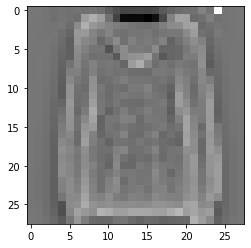

In [ ]:
tmp = testimg[10,:].reshape((28,28))
plt.imshow(tmp, cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
testlabel = np.array(list(fmnist_test_finaldf["labels"].values))
testlabel

array([0, 1, 1, ..., 0, 0, 1])

Trainin data split : All samples of Pullover and 500 samples for coat

In [ ]:
traindata_iter1 = fmnist_train_finaldf[(fmnist_train_finaldf["labels"] == 0) ]
traindata_iter1 = traindata_iter1.append(fmnist_train_finaldf[fmnist_train_finaldf["labels"] == 1][0:500])
traindata_iter1

,labels,images
5,0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 22, 88, 188, 172, ..."
7,0,"[0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 63, 28, 0, 0..."
27,0,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 70, 173, 202, 169,..."
37,0,"[0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 34, 95, 0, 0, 0..."
45,0,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 34, 148, 202, 107,..."
...,...,...
5042,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 22, 96, 1..."
5066,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
5106,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 20, 39..."
5132,1,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 46, 59, 52, 50,..."


In [ ]:
train_label_iter1 = np.array(list(traindata_iter1["labels"].values))
train_img_iter1 = np.array(list(traindata_iter1["images"].values))
train_img_iter1 = preprocessing.scale(train_img_iter1)

In [ ]:
train_img_iter1

array([[-0.01240443, -0.045721  , -0.05719597, ..., -0.27674157,
        -0.11720215, -0.04257742],
       [-0.01240443, -0.045721  , -0.05719597, ...,  2.46607919,
        -0.11720215, -0.04257742],
       [-0.01240443, -0.045721  , -0.05719597, ..., -0.27674157,
        -0.11720215, -0.04257742],
       ...,
       [-0.01240443, -0.045721  , -0.05719597, ..., -0.27674157,
        -0.11720215, -0.04257742],
       [-0.01240443, -0.045721  , -0.05719597, ..., -0.27674157,
        -0.11720215, -0.04257742],
       [-0.01240443, -0.045721  , -0.05719597, ..., -0.27674157,
        -0.11720215, -0.04257742]])

# Experiment 1


Algorithm : Linear SVM

In [ ]:
clf = svm.SVC(C =10, gamma=.1, kernel='linear', probability=True)
clf.fit(train_img_iter1,train_label_iter1)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
test_label_pred = clf.predict(testimg)
test_label_pred_prob = clf.predict_proba(testimg)

print('\n Calculating Accuracy of SVM in iteration 1 : ')
test_acc_svm_1 = accuracy_score(testlabel,test_label_pred)
test_acc_svm_1


 Calculating Accuracy of SVM in iteration 1 : 


0.5885

In [ ]:
test_label_pred_prob

array([[8.46893452e-01, 1.53106548e-01],
       [8.55706968e-01, 1.44293032e-01],
       [8.53383278e-01, 1.46616722e-01],
       ...,
       [9.99999900e-01, 1.00000010e-07],
       [9.37983792e-01, 6.20162075e-02],
       [9.74078902e-01, 2.59210976e-02]])

Algorithm : 5 layer neural network with architecture: [ 128 -- 128 -- 128 -- 64 -- 1 ]

In [ ]:
nn_model = Sequential()

#get number of columns in training data
n_cols = train_img_iter1.shape[1]


#add model layers
nn_model.add(Dense(128, activation='relu', input_shape=(n_cols,)))
nn_model.add(Dense(128, activation='relu'))
nn_model.add(Dense(128, activation='relu'))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))
nn_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 141,825
Trainable params: 141,825
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stopping_monitor = EarlyStopping(patience=3)
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
nn_model.fit(train_img_iter1,train_label_iter1, epochs=100,callbacks=[early_stopping_monitor])

Epoch 1/100
204/204 [==============================] - 2s 3ms/step - loss: 0.2305 - accuracy: 0.9221
Epoch 2/100
204/204 [==============================] - 1s 3ms/step - loss: 0.1437 - accuracy: 0.9424
Epoch 3/100
204/204 [==============================] - 1s 3ms/step - loss: 0.1230 - accuracy: 0.9540
Epoch 4/100
204/204 [==============================] - 1s 3ms/step - loss: 0.0989 - accuracy: 0.9612
Epoch 5/100
204/204 [==============================] - 1s 3ms/step - loss: 0.0780 - accuracy: 0.9719
Epoch 6/100
204/204 [==============================] - 1s 3ms/step - loss: 0.0707 - accuracy: 0.9738
Epoch 7/100
204/204 [==============================] - 1s 3ms/step - loss: 0.0694 - accuracy: 0.9716
Epoch 8/100
204/204 [==============================] - 1s 3ms/step - loss: 0.0688 - accuracy: 0.9730
Epoch 9/100
204/204 [==============================] - 1s 3ms/step - loss: 0.0613 - accuracy: 0.9789
Epoch 10/100
204/204 [==============================] - 1s 3ms/step - loss: 0.0562 - accura

In [ ]:
print('\n Calculating Accuracy of neural network in iteration 1 : ')
test_loss_nn_1, test_acc_nn_1 = nn_model.evaluate(testimg, testlabel)


 Calculating Accuracy of neural network in iteration 1 : 
63/63 [==============================] - 0s 2ms/step - loss: 8.8198 - accuracy: 0.7165


In [ ]:
 test_labels_pred_prob_nn1 = nn_model.predict(testimg)

In [ ]:
 test_labels_pred_prob_nn1

array([[0.000000e+00],
       [1.000000e+00],
       [9.998587e-01],
       ...,
       [0.000000e+00],
       [0.000000e+00],
       [2.788765e-26]], dtype=float32)

# Experiment 2 

In [ ]:
traindata_iter2 = fmnist_train_finaldf[(fmnist_train_finaldf["labels"] == 0) ]
traindata_iter2 = traindata_iter2.append(fmnist_train_finaldf[fmnist_train_finaldf["labels"] == 1][500:1000])
traindata_iter2

,labels,images
5,0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 22, 88, 188, 172, ..."
7,0,"[0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 63, 28, 0, 0..."
27,0,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 70, 173, 202, 169,..."
37,0,"[0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 34, 95, 0, 0, 0..."
45,0,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 34, 148, 202, 107,..."
...,...,...
10290,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 42, 132, 159, 1..."
10291,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 30, 0,..."
10301,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 112, 210,..."
10312,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 104, 117,..."


In [ ]:
train_label_iter2 = np.array(list(traindata_iter2["labels"].values))
train_img_iter2 = np.array(list(traindata_iter2["images"].values))
train_img_iter2 = preprocessing.scale(train_img_iter2)

Algorithm : Linear SVM

In [ ]:
clf2 = svm.SVC(C =10, gamma=.1, kernel='linear', probability=True)
clf2.fit(train_img_iter2,train_label_iter2)

test_label_pred2 = clf2.predict(testimg)
test_label_pred2_prob = clf2.predict_proba(testimg)

print('\n Calculating Accuracy of SVM in iteration 2 : ')
test_acc_svm_2 = accuracy_score(testlabel,test_label_pred2)
test_acc_svm_2


 Calculating Accuracy of SVM in iteration 2 : 


0.6045

Algorithm : 5 layer neural network with architecture: [ 128 -- 128 -- 128 -- 64 -- 1 ]

In [ ]:
nn_model2 = Sequential()
#get number of columns in training data
n_cols = train_img_iter2.shape[1]
#add model layers
nn_model2.add(Dense(128, activation='relu', input_shape=(n_cols,)))
nn_model2.add(Dense(128, activation='relu'))
nn_model2.add(Dense(128, activation='relu'))
nn_model2.add(Dense(64, activation='relu'))
nn_model2.add(Dense(1, activation='sigmoid'))
nn_model2.summary()

nn_model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model2.fit(train_img_iter2,train_label_iter2, epochs=100,callbacks=[early_stopping_monitor])




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 141,825
Trainable params: 141,825
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
204/204 [==============================] - 1s 3ms/step - loss: 0.2206 - accuracy: 0.9276
Epoch 2/100
2

In [ ]:
print('\n Calculating Accuracy of neural network in iteration 2 : ')
test_loss_nn_2, test_acc_nn_2 = nn_model2.evaluate(testimg, testlabel)


 Calculating Accuracy of neural network in iteration 2 : 
63/63 [==============================] - 0s 1ms/step - loss: 11.3608 - accuracy: 0.6955


In [ ]:
 test_labels_pred_prob_nn2 = nn_model2.predict(testimg)

# Experiment 3

In [ ]:
traindata_iter3 = fmnist_train_finaldf[(fmnist_train_finaldf["labels"] == 0) ]
traindata_iter3 = traindata_iter3.append(fmnist_train_finaldf[fmnist_train_finaldf["labels"] == 1][1000:1500])
traindata_iter3

,labels,images
5,0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 22, 88, 188, 172, ..."
7,0,"[0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 63, 28, 0, 0..."
27,0,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 70, 173, 202, 169,..."
37,0,"[0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 34, 95, 0, 0, 0..."
45,0,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 34, 148, 202, 107,..."
...,...,...
15148,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 30, 101, 113..."
15180,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 56, 202, 199..."
15204,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 64, 85, 1..."
15223,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 96, 76, 0, 25, ..."


In [ ]:
train_label_iter3 = np.array(list(traindata_iter3["labels"].values))
train_img_iter3 = np.array(list(traindata_iter3["images"].values))
train_img_iter3 = preprocessing.scale(train_img_iter3)

**Algorithm : Linear SVM**

In [ ]:
clf3 = svm.SVC(C =10, gamma=.1, kernel='linear', probability=True)
clf3.fit(train_img_iter3,train_label_iter3)

test_label_pred3 = clf3.predict(testimg)
test_label_pred3_prob = clf3.predict_proba(testimg)

print('\n Calculating Accuracy of SVM in iteration 3 : ')
test_acc_svm_3 = accuracy_score(testlabel,test_label_pred3)
test_acc_svm_3


 Calculating Accuracy of SVM in iteration 3 : 


0.6645

Algorithm : 5 layer neural network with architecture: [ 128 -- 128 -- 128 -- 64 -- 1 ]

In [ ]:
nn_model3 = Sequential()
#get number of columns in training data
n_cols = train_img_iter3.shape[1]
#add model layers
nn_model3.add(Dense(128, activation='relu', input_shape=(n_cols,)))
nn_model3.add(Dense(128, activation='relu'))
nn_model3.add(Dense(128, activation='relu'))
nn_model3.add(Dense(64, activation='relu'))
nn_model3.add(Dense(1, activation='sigmoid'))
nn_model3.summary()

nn_model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model3.fit(train_img_iter3,train_label_iter3, epochs=100,callbacks=[early_stopping_monitor])


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_12 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 141,825
Trainable params: 141,825
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
204/204 [==============================] - 1s 3ms/step - loss: 0.2217 - accuracy: 0.9241
Epoch 2/100
2

In [ ]:
print('\n Calculating Accuracy of neural network in iteration 2 : ')
test_loss_nn_3, test_acc_nn_3 = nn_model3.evaluate(testimg, testlabel)


 Calculating Accuracy of neural network in iteration 2 : 
63/63 [==============================] - 0s 1ms/step - loss: 9.0659 - accuracy: 0.7290


In [ ]:
 test_labels_pred_prob_nn3 = nn_model3.predict(testimg)

# Testing Performance 

In [ ]:
from tabulate import tabulate
mean_acc_svm = np.mean((test_acc_svm_1,test_acc_svm_2,test_acc_svm_3),dtype=np.float32)
mean_acc_nn = np.mean((test_acc_nn_1,test_acc_nn_2,test_acc_nn_3),dtype=np.float32)

std_acc_svm = np.std((test_acc_svm_1,test_acc_svm_2,test_acc_svm_3),dtype=np.float32)
std_acc_nn = np.std((test_acc_nn_1,test_acc_nn_2,test_acc_nn_3),dtype=np.float32)

table = [[1,test_acc_svm_1,test_acc_nn_1],
         [2,test_acc_svm_2,test_acc_nn_2],
         [3,test_acc_svm_3,test_acc_nn_3],
         ["mean",mean_acc_svm,mean_acc_nn],
         ["standard devation",std_acc_svm,std_acc_nn ]]

print("\n Testing Performance and Accuracy \n ")
print(tabulate(table, headers=["Experiment","SVM", "Neural Network"]))


 Testing Performance and Accuracy 
 
Experiment               SVM    Neural Network
-----------------  ---------  ----------------
1                  0.5885            0.7165
2                  0.6045            0.6955
3                  0.6645            0.729
mean               0.619167          0.713667
standard devation  0.0327143         0.0138223


# Confusion Matrix

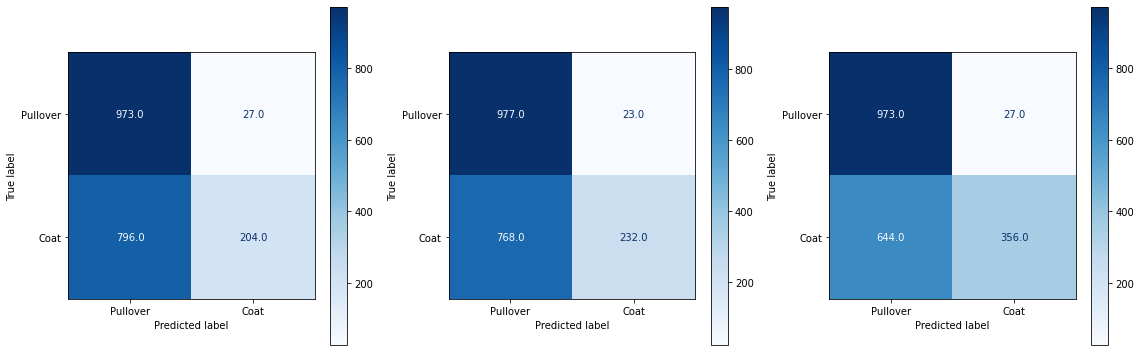

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

svm_conf_exp1 = plot_confusion_matrix(clf, testimg, testlabel, cmap=plt.cm.Blues,values_format=".1f",display_labels=["Pullover","Coat"],ax = axes[0])
svm_conf_exp2 = plot_confusion_matrix(clf2, testimg, testlabel, cmap=plt.cm.Blues,values_format=".1f",display_labels=["Pullover","Coat"],ax =axes[1])
svm_conf_exp3 = plot_confusion_matrix(clf3, testimg, testlabel, cmap=plt.cm.Blues,values_format=".1f",display_labels=["Pullover","Coat"],ax = axes[2])
#disp.ax_.set_title("Testing accuracy :", int(test_acc_svm_1)
#print("Testing accuracy :", test_acc_svm_1)
#print(svm_conf.confusion_matrix)
fig.tight_layout()

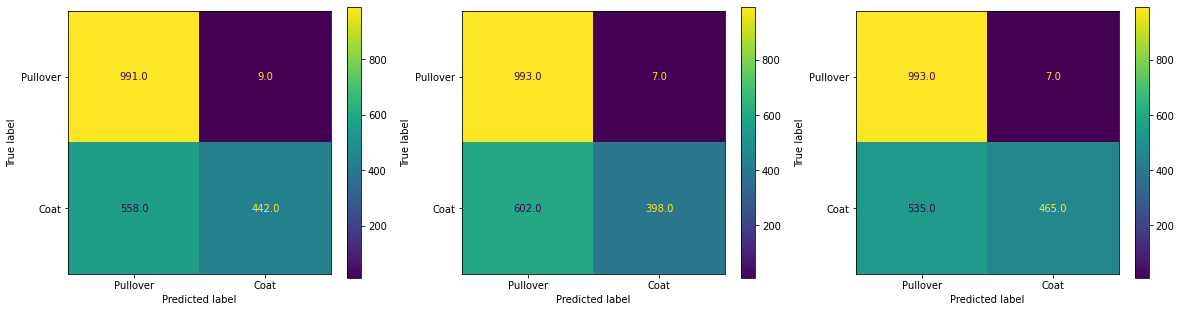

In [ ]:
cm_nn1 = confusion_matrix (testlabel,test_labels_pred_prob_nn1.round() )
cm_nn2 = confusion_matrix (testlabel,test_labels_pred_prob_nn2.round() )
cm_nn3 = confusion_matrix (testlabel,test_labels_pred_prob_nn3.round() )

fig, axen = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

cm_display1 = ConfusionMatrixDisplay(cm_nn1,display_labels=["Pullover","Coat"]).plot(ax = axen[0],values_format=".1f")
cm_display2 = ConfusionMatrixDisplay(cm_nn2,display_labels=["Pullover","Coat"]).plot(ax = axen[1],values_format=".1f")
cm_display3 = ConfusionMatrixDisplay(cm_nn3,display_labels=["Pullover","Coat"]).plot(ax = axen[2],values_format=".1f")


# **ROC Curve**

In [ ]:
def classfi_prob(testlabel_predprob,thresh) :
  testlabel_pred_onecol = []
  testlabel_predprob_onecol= testlabel_predprob[:,0]
  for n, i in enumerate(testlabel_predprob_onecol):
   if i > thresh :
      testlabel_pred_onecol.append(0)
   else :
      testlabel_pred_onecol.append(1)
  return testlabel_pred_onecol


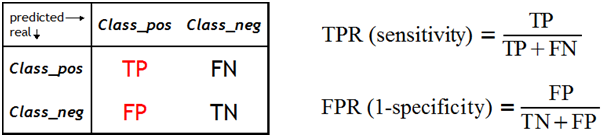

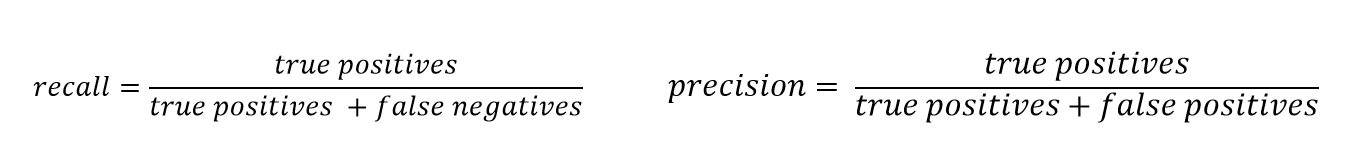

### FNR = FN / TP+FN

SVM Algorithm :

In [ ]:
def FPR(conf_mtrx):
    return conf_mtrx[1][0] / (conf_mtrx[1][0] + conf_mtrx[1][1]) if (conf_mtrx[1][0] + conf_mtrx[1][1])!=0 else 0
def TPR(conf_mtrx):
    return conf_mtrx[0][0] / (conf_mtrx[0][0] + conf_mtrx[0][1]) if (conf_mtrx[0][0] + conf_mtrx[0][1])!=0 else 0
def FNR(conf_mtrx):
    return conf_mtrx[0][1] / (conf_mtrx[0][0] + conf_mtrx[0][1]) if (conf_mtrx[0][0] + conf_mtrx[0][1])!=0 else 0
def preci(conf_mtrx):
    return conf_mtrx[0][0] / (conf_mtrx[0][0] + conf_mtrx[1][0]) if (conf_mtrx[0][0] + conf_mtrx[1][0])!=0 else 0
def recal(conf_mtrx):
    return conf_mtrx[0][0] / (conf_mtrx[0][0] + conf_mtrx[0][1]) if (conf_mtrx[0][0] + conf_mtrx[0][1])!=0 else 0
def eer(mean_tpr, mean_fpr):
  mean_fnr = 1- mean_tpr
  diff = np.abs(mean_fpr - mean_fnr)
  index = np.argmin(diff)
  eer = np.mean((mean_fpr[index], mean_fnr[index]))
  return eer, index

In [ ]:
test_label_pred_prob_thresh1 =classfi_prob(test_label_pred_prob,0.2)
svm_conf_exp1_thresh1 = confusion_matrix (testlabel,test_label_pred_prob_thresh1)
test_label_pred_prob_thresh2 =classfi_prob(test_label_pred_prob,0.4) 
svm_conf_exp1_thresh2 = confusion_matrix (testlabel,test_label_pred_prob_thresh2)
test_label_pred_prob_thresh3 =classfi_prob(test_label_pred_prob,0.6) 
svm_conf_exp1_thresh3 = confusion_matrix (testlabel,test_label_pred_prob_thresh3)
test_label_pred_prob_thresh4 =classfi_prob(test_label_pred_prob,0.8) 
svm_conf_exp1_thresh4 = confusion_matrix (testlabel,test_label_pred_prob_thresh4)
test_label_pred_prob_thresh5 =classfi_prob(test_label_pred_prob,0.9)
svm_conf_exp1_thresh5 = confusion_matrix (testlabel,test_label_pred_prob_thresh5)
test_label_pred_prob_thresh6 =classfi_prob(test_label_pred_prob,0.95) 
svm_conf_exp1_thresh6 = confusion_matrix (testlabel,test_label_pred_prob_thresh6)

In [ ]:
tpr_svm1 ,tpr_svm2 ,tpr_svm3 ,fpr_svm1,fpr_svm2,fpr_svm3,fnr_svm1,fnr_svm2,fnr_svm3,preci_svm1,preci_svm2,preci_svm3,recal_svm1,recal_svm2,recal_svm3,= ([] for i in range(15))

In [ ]:
tpr_svm1.extend((TPR(svm_conf_exp1_thresh1),TPR(svm_conf_exp1_thresh2),TPR(svm_conf_exp1_thresh3),TPR(svm_conf_exp1_thresh4),TPR(svm_conf_exp1_thresh5),TPR(svm_conf_exp1_thresh6)))
fpr_svm1.extend((FPR(svm_conf_exp1_thresh1),FPR(svm_conf_exp1_thresh2),FPR(svm_conf_exp1_thresh3),FPR(svm_conf_exp1_thresh4),FPR(svm_conf_exp1_thresh5),FPR(svm_conf_exp1_thresh6)))
fnr_svm1.extend((FNR(svm_conf_exp1_thresh1),FNR(svm_conf_exp1_thresh2),FNR(svm_conf_exp1_thresh3),FNR(svm_conf_exp1_thresh4),FNR(svm_conf_exp1_thresh5),FNR(svm_conf_exp1_thresh6)))
preci_svm1.extend((preci(svm_conf_exp1_thresh1),preci(svm_conf_exp1_thresh2),preci(svm_conf_exp1_thresh3),preci(svm_conf_exp1_thresh4),preci(svm_conf_exp1_thresh5),preci(svm_conf_exp1_thresh6)))
recal_svm1.extend((recal(svm_conf_exp1_thresh1),recal(svm_conf_exp1_thresh2),recal(svm_conf_exp1_thresh3),recal(svm_conf_exp1_thresh4),recal(svm_conf_exp1_thresh5),recal(svm_conf_exp1_thresh6)))



In [ ]:
test_label_pred2_prob_thresh1 =classfi_prob(test_label_pred2_prob,0.2)
svm_conf_exp2_thresh1 = confusion_matrix (testlabel,test_label_pred2_prob_thresh1)
test_label_pred2_prob_thresh2 =classfi_prob(test_label_pred2_prob,0.4) 
svm_conf_exp2_thresh2 = confusion_matrix (testlabel,test_label_pred2_prob_thresh2)
test_label_pred2_prob_thresh3 =classfi_prob(test_label_pred2_prob,0.6) 
svm_conf_exp2_thresh3 = confusion_matrix (testlabel,test_label_pred2_prob_thresh3)
test_label_pred2_prob_thresh4 =classfi_prob(test_label_pred2_prob,0.8) 
svm_conf_exp2_thresh4 = confusion_matrix (testlabel,test_label_pred2_prob_thresh4)
test_label_pred2_prob_thresh5 =classfi_prob(test_label_pred2_prob,0.9)
svm_conf_exp2_thresh5 = confusion_matrix (testlabel,test_label_pred2_prob_thresh5)
test_label_pred2_prob_thresh6 =classfi_prob(test_label_pred2_prob,0.95) 
svm_conf_exp2_thresh6 = confusion_matrix (testlabel,test_label_pred2_prob_thresh6)

In [ ]:
tpr_svm2.extend((TPR(svm_conf_exp2_thresh1),TPR(svm_conf_exp2_thresh2),TPR(svm_conf_exp2_thresh3),TPR(svm_conf_exp2_thresh4),TPR(svm_conf_exp2_thresh5),TPR(svm_conf_exp2_thresh6)))
fpr_svm2.extend((FPR(svm_conf_exp2_thresh1),FPR(svm_conf_exp2_thresh2),FPR(svm_conf_exp2_thresh3),FPR(svm_conf_exp2_thresh4),FPR(svm_conf_exp2_thresh5),FPR(svm_conf_exp2_thresh6)))
fnr_svm2.extend((FNR(svm_conf_exp2_thresh1),FNR(svm_conf_exp2_thresh2),FNR(svm_conf_exp2_thresh3),FNR(svm_conf_exp2_thresh4),FNR(svm_conf_exp2_thresh5),FNR(svm_conf_exp2_thresh6)))
preci_svm2.extend((preci(svm_conf_exp2_thresh1),preci(svm_conf_exp2_thresh2),preci(svm_conf_exp2_thresh3),preci(svm_conf_exp2_thresh4),preci(svm_conf_exp2_thresh5),preci(svm_conf_exp2_thresh6)))
recal_svm2.extend((recal(svm_conf_exp2_thresh1),recal(svm_conf_exp2_thresh2),recal(svm_conf_exp2_thresh3),recal(svm_conf_exp2_thresh4),recal(svm_conf_exp2_thresh5),recal(svm_conf_exp2_thresh6)))



In [ ]:
test_label_pred3_prob_thresh1 =classfi_prob(test_label_pred3_prob,0.2)
svm_conf_exp3_thresh1 = confusion_matrix (testlabel,test_label_pred3_prob_thresh1)
test_label_pred3_prob_thresh2 =classfi_prob(test_label_pred3_prob,0.4) 
svm_conf_exp3_thresh2 = confusion_matrix (testlabel,test_label_pred3_prob_thresh2)
test_label_pred3_prob_thresh3 =classfi_prob(test_label_pred3_prob,0.6) 
svm_conf_exp3_thresh3 = confusion_matrix (testlabel,test_label_pred3_prob_thresh3)
test_label_pred3_prob_thresh4 =classfi_prob(test_label_pred3_prob,0.8) 
svm_conf_exp3_thresh4 = confusion_matrix (testlabel,test_label_pred3_prob_thresh4)
test_label_pred3_prob_thresh5 =classfi_prob(test_label_pred3_prob,0.9)
svm_conf_exp3_thresh5 = confusion_matrix (testlabel,test_label_pred3_prob_thresh5)
test_label_pred3_prob_thresh6 =classfi_prob(test_label_pred3_prob,0.95) 
svm_conf_exp3_thresh6 = confusion_matrix (testlabel,test_label_pred3_prob_thresh6)

In [ ]:
tpr_svm3.extend((TPR(svm_conf_exp3_thresh1),TPR(svm_conf_exp3_thresh2),TPR(svm_conf_exp3_thresh3),TPR(svm_conf_exp3_thresh4),TPR(svm_conf_exp3_thresh5),TPR(svm_conf_exp3_thresh6)))
fpr_svm3.extend((FPR(svm_conf_exp3_thresh1),FPR(svm_conf_exp3_thresh2),FPR(svm_conf_exp3_thresh3),FPR(svm_conf_exp3_thresh4),FPR(svm_conf_exp3_thresh5),FPR(svm_conf_exp3_thresh6)))
fnr_svm3.extend((FNR(svm_conf_exp3_thresh1),FNR(svm_conf_exp3_thresh2),FNR(svm_conf_exp3_thresh3),FNR(svm_conf_exp3_thresh4),FNR(svm_conf_exp3_thresh5),FNR(svm_conf_exp3_thresh6)))
preci_svm3.extend((preci(svm_conf_exp3_thresh1),preci(svm_conf_exp3_thresh2),preci(svm_conf_exp3_thresh3),preci(svm_conf_exp3_thresh4),preci(svm_conf_exp3_thresh5),preci(svm_conf_exp3_thresh6)))
recal_svm3.extend((recal(svm_conf_exp3_thresh1),recal(svm_conf_exp3_thresh2),recal(svm_conf_exp3_thresh3),recal(svm_conf_exp3_thresh4),recal(svm_conf_exp3_thresh5),recal(svm_conf_exp3_thresh6)))



In [ ]:
tpr_svm_all ,fpr_svm_all ,fnr_svm_all,preci_svm_all,recal_svm_all = ([] for i in range(5))

In [ ]:
tpr_svm_all.extend((tpr_svm1,tpr_svm2,tpr_svm3))
fpr_svm_all.extend((fpr_svm1,fpr_svm2,fpr_svm3))
fnr_svm_all.extend((fnr_svm1,fnr_svm2,fnr_svm3))
preci_svm_all.extend((preci_svm1,preci_svm2,preci_svm3))
recal_svm_all.extend((recal_svm1,recal_svm2,recal_svm3))


In [ ]:
mean_tpr_svm = np.mean(tpr_svm_all, axis=0)
mean_fpr_svm = np.mean(fpr_svm_all,axis=0)
mean_prec_svm = np.mean(preci_svm_all, axis=0)
mean_rec_svm = np.mean(recal_svm_all, axis=0)
std_tpr_svm = np.std(tpr_svm_all, axis=0)
mean_auc_svm = auc(mean_fpr_svm, mean_tpr_svm)

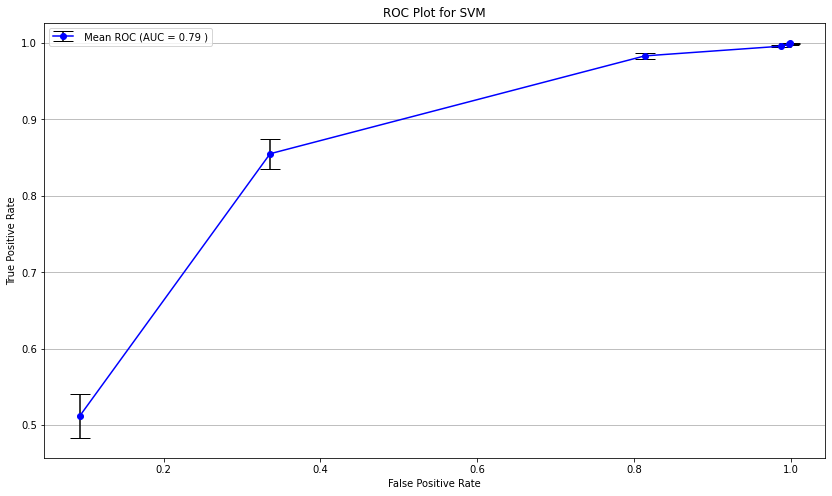

In [ ]:
plt.figure(figsize=(14,8))
plt.errorbar(mean_fpr_svm, mean_tpr_svm,yerr = std_tpr_svm, fmt='-o', color='b', ecolor='black', capsize=10, label=r' Mean ROC (AUC = %0.2f )' % (mean_auc_svm))
# Title
plt.title('ROC Plot for SVM')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
plt.grid(axis='y')
# Show plot
plt.show()

In [ ]:
eer_svm, index_eer_svm = eer(mean_tpr_svm, mean_fpr_svm)

In [ ]:
thresholds = [0.2,0.4,0.6,0.8,0.9,0.95]
print("Equal Error Rate in SVM with threshold : ")
print("EER",'%.4f'%eer_svm)
print("Threshold : ", thresholds[index_eer_svm])

Equal Error Rate in SVM with threshold : 
EER 0.2403
Threshold :  0.9


5 layer Neural Network 



In [ ]:
def classfi_prob_nn(testlabel_predprob,thresh) :
  testlabel_pred_onecol = []
  testlabel_predprob_onecol= testlabel_predprob
  for n, i in enumerate(testlabel_predprob_onecol):
   if i > thresh :
      testlabel_pred_onecol.append(0)
   else :
      testlabel_pred_onecol.append(1)
  return testlabel_pred_onecol

In [ ]:
 test_labels_pred_prob_nn1_thresh1 =classfi_prob_nn( test_labels_pred_prob_nn1,0.2)
nn1_conf_exp1_thresh1 = confusion_matrix (testlabel, test_labels_pred_prob_nn1_thresh1)
 test_labels_pred_prob_nn1_thresh2 =classfi_prob_nn( test_labels_pred_prob_nn1,0.4) 
nn1_conf_exp1_thresh2 = confusion_matrix (testlabel, test_labels_pred_prob_nn1_thresh2)
 test_labels_pred_prob_nn1_thresh3 =classfi_prob_nn( test_labels_pred_prob_nn1,0.6) 
nn1_conf_exp1_thresh3 = confusion_matrix (testlabel, test_labels_pred_prob_nn1_thresh3)
 test_labels_pred_prob_nn1_thresh4 =classfi_prob_nn( test_labels_pred_prob_nn1,0.8) 
nn1_conf_exp1_thresh4 = confusion_matrix (testlabel, test_labels_pred_prob_nn1_thresh4)
 test_labels_pred_prob_nn1_thresh5 =classfi_prob_nn( test_labels_pred_prob_nn1,0.9)
nn1_conf_exp1_thresh5 = confusion_matrix (testlabel, test_labels_pred_prob_nn1_thresh5)
 test_labels_pred_prob_nn1_thresh6 =classfi_prob_nn( test_labels_pred_prob_nn1,0.95) 
nn1_conf_exp1_thresh6 = confusion_matrix (testlabel, test_labels_pred_prob_nn1_thresh6)


In [ ]:
nn1_conf_exp1_thresh1,nn1_conf_exp1_thresh2,nn1_conf_exp1_thresh3,nn1_conf_exp1_thresh4,nn1_conf_exp1_thresh5,nn1_conf_exp1_thresh6

(array([[  9, 991],
        [454, 546]]), array([[  9, 991],
        [447, 553]]), array([[  9, 991],
        [438, 562]]), array([[  8, 992],
        [428, 572]]), array([[  8, 992],
        [422, 578]]), array([[  8, 992],
        [418, 582]]))

In [ ]:
tpr_nn1 ,tpr_nn2 ,tpr_nn3 ,fpr_nn1,fpr_nn2,fpr_nn3,fnr_nn1,fnr_nn2,fnr_nn3,preci_nn1,preci_nn2,preci_nn3,recal_nn1,recal_nn2,recal_nn3,= ([] for i in range(15))

In [ ]:
tpr_nn1.extend((TPR(nn1_conf_exp1_thresh1),TPR(nn1_conf_exp1_thresh2),TPR(nn1_conf_exp1_thresh3),TPR(nn1_conf_exp1_thresh4),TPR(nn1_conf_exp1_thresh5),TPR(nn1_conf_exp1_thresh6)))

In [ ]:
fpr_nn1.extend((FPR(nn1_conf_exp1_thresh1),FPR(nn1_conf_exp1_thresh2),FPR(nn1_conf_exp1_thresh3),FPR(nn1_conf_exp1_thresh4),FPR(nn1_conf_exp1_thresh5),FPR(nn1_conf_exp1_thresh6)))

In [ ]:
fnr_nn1.extend((FNR(nn1_conf_exp1_thresh1),FNR(nn1_conf_exp1_thresh2),FNR(nn1_conf_exp1_thresh3),FNR(nn1_conf_exp1_thresh4),FNR(nn1_conf_exp1_thresh5),FNR(nn1_conf_exp1_thresh6)))

In [ ]:
preci_nn1.extend((preci(nn1_conf_exp1_thresh1),preci(nn1_conf_exp1_thresh2),preci(nn1_conf_exp1_thresh3),preci(nn1_conf_exp1_thresh4),preci(nn1_conf_exp1_thresh5),preci(nn1_conf_exp1_thresh6)))


In [ ]:
recal_nn1.extend((recal(nn1_conf_exp1_thresh1),recal(nn1_conf_exp1_thresh2),recal(nn1_conf_exp1_thresh3),recal(nn1_conf_exp1_thresh4),recal(nn1_conf_exp1_thresh5),recal(nn1_conf_exp1_thresh6)))

In [ ]:
 test_labels_pred_prob_nn2_thresh1 =classfi_prob_nn( test_labels_pred_prob_nn2,0.02)
nn2_conf_exp2_thresh1 = confusion_matrix (testlabel, test_labels_pred_prob_nn2_thresh1)
 test_labels_pred_prob_nn2_thresh2 =classfi_prob_nn( test_labels_pred_prob_nn2,0.04) 
nn2_conf_exp2_thresh2 = confusion_matrix (testlabel, test_labels_pred_prob_nn2_thresh2)
 test_labels_pred_prob_nn2_thresh3 =classfi_prob_nn( test_labels_pred_prob_nn2,0.06) 
nn2_conf_exp2_thresh3 = confusion_matrix (testlabel, test_labels_pred_prob_nn2_thresh3)
 test_labels_pred_prob_nn2_thresh4 =classfi_prob_nn( test_labels_pred_prob_nn2,0.08) 
nn2_conf_exp2_thresh4 = confusion_matrix (testlabel, test_labels_pred_prob_nn2_thresh4)
 test_labels_pred_prob_nn2_thresh5 =classfi_prob_nn( test_labels_pred_prob_nn2,0.09)
nn2_conf_exp2_thresh5 = confusion_matrix (testlabel, test_labels_pred_prob_nn2_thresh5)
 test_labels_pred_prob_nn2_thresh6 =classfi_prob_nn( test_labels_pred_prob_nn2,0.095) 
nn2_conf_exp2_thresh6 = confusion_matrix (testlabel, test_labels_pred_prob_nn2_thresh6)

In [ ]:
tpr_nn2.extend((TPR(nn2_conf_exp2_thresh1),TPR(nn2_conf_exp2_thresh2),TPR(nn2_conf_exp2_thresh3),TPR(nn2_conf_exp2_thresh4),TPR(nn2_conf_exp2_thresh5),TPR(nn2_conf_exp2_thresh6)))

fpr_nn2.extend((FPR(nn2_conf_exp2_thresh1),FPR(nn2_conf_exp2_thresh2),FPR(nn2_conf_exp2_thresh3),FPR(nn2_conf_exp2_thresh4),FPR(nn2_conf_exp2_thresh5),FPR(nn2_conf_exp2_thresh6)))

fnr_nn2.extend((FNR(nn2_conf_exp2_thresh1),FNR(nn2_conf_exp2_thresh2),FNR(nn2_conf_exp2_thresh3),FNR(nn2_conf_exp2_thresh4),FNR(nn2_conf_exp2_thresh5),FNR(nn2_conf_exp2_thresh6)))

preci_nn2.extend((preci(nn2_conf_exp2_thresh1),preci(nn2_conf_exp2_thresh2),preci(nn2_conf_exp2_thresh3),preci(nn2_conf_exp2_thresh4),preci(nn2_conf_exp2_thresh5),preci(nn2_conf_exp2_thresh6)))


recal_nn2.extend((recal(nn2_conf_exp2_thresh1),recal(nn2_conf_exp2_thresh2),recal(nn2_conf_exp2_thresh3),recal(nn2_conf_exp2_thresh4),recal(nn2_conf_exp2_thresh5),recal(nn2_conf_exp2_thresh6)))

In [ ]:
 test_labels_pred_prob_nn3_thresh1 =classfi_prob_nn( test_labels_pred_prob_nn3,0.02)
nn3_conf_exp3_thresh1 = confusion_matrix (testlabel, test_labels_pred_prob_nn3_thresh1)
 test_labels_pred_prob_nn3_thresh2 =classfi_prob_nn( test_labels_pred_prob_nn3,0.04) 
nn3_conf_exp3_thresh2 = confusion_matrix (testlabel, test_labels_pred_prob_nn3_thresh2)
 test_labels_pred_prob_nn3_thresh3 =classfi_prob_nn( test_labels_pred_prob_nn3,0.06) 
nn3_conf_exp3_thresh3 = confusion_matrix (testlabel, test_labels_pred_prob_nn3_thresh3)
 test_labels_pred_prob_nn3_thresh4 =classfi_prob_nn( test_labels_pred_prob_nn3,0.08) 
nn3_conf_exp3_thresh4 = confusion_matrix (testlabel, test_labels_pred_prob_nn3_thresh4)
 test_labels_pred_prob_nn3_thresh5 =classfi_prob_nn( test_labels_pred_prob_nn3,0.09)
nn3_conf_exp3_thresh5 = confusion_matrix (testlabel, test_labels_pred_prob_nn3_thresh5)
 test_labels_pred_prob_nn3_thresh6 =classfi_prob_nn( test_labels_pred_prob_nn3,0.095) 
nn3_conf_exp3_thresh6 = confusion_matrix (testlabel, test_labels_pred_prob_nn3_thresh6)

In [ ]:
tpr_nn3.extend((TPR(nn3_conf_exp3_thresh1),TPR(nn3_conf_exp3_thresh2),TPR(nn3_conf_exp3_thresh3),TPR(nn3_conf_exp3_thresh4),TPR(nn3_conf_exp3_thresh5),TPR(nn3_conf_exp3_thresh6)))

fpr_nn3.extend((FPR(nn3_conf_exp3_thresh1),FPR(nn3_conf_exp3_thresh2),FPR(nn3_conf_exp3_thresh3),FPR(nn3_conf_exp3_thresh4),FPR(nn3_conf_exp3_thresh5),FPR(nn3_conf_exp3_thresh6)))

fnr_nn3.extend((FNR(nn3_conf_exp3_thresh1),FNR(nn3_conf_exp3_thresh2),FNR(nn3_conf_exp3_thresh3),FNR(nn3_conf_exp3_thresh4),FNR(nn3_conf_exp3_thresh5),FNR(nn3_conf_exp3_thresh6)))

preci_nn3.extend((preci(nn3_conf_exp3_thresh1),preci(nn3_conf_exp3_thresh2),preci(nn3_conf_exp3_thresh3),preci(nn3_conf_exp3_thresh4),preci(nn3_conf_exp3_thresh5),preci(nn3_conf_exp3_thresh6)))


recal_nn3.extend((recal(nn3_conf_exp3_thresh1),recal(nn3_conf_exp3_thresh2),recal(nn3_conf_exp3_thresh3),recal(nn3_conf_exp3_thresh4),recal(nn3_conf_exp3_thresh5),recal(nn3_conf_exp3_thresh6)))

In [ ]:
tpr_nn_all ,fpr_nn_all ,fnr_nn_all,preci_nn_all,recal_nn_all = ([] for i in range(5))

In [ ]:
tpr_nn_all.extend((tpr_nn1,tpr_nn2,tpr_nn3))
fpr_nn_all.extend((fpr_nn1,fpr_nn2,fpr_nn3))
fnr_nn_all.extend((fnr_nn1,fnr_nn2,fnr_nn3))
preci_nn_all.extend((preci_nn1,preci_nn2,preci_nn3))
recal_nn_all.extend((recal_nn1,recal_nn2,recal_nn3))

In [ ]:
mean_tpr_nn = np.mean(tpr_nn_all, axis=0)
mean_fpr_nn = np.mean(fpr_nn_all,axis=0)
mean_prec_nn = np.mean(preci_nn_all, axis=0)
mean_rec_nn = np.mean(recal_nn_all, axis=0)
std_tpr_nn = np.std(tpr_nn_all, axis=0)
mean_auc_nn = auc(mean_fpr_nn, mean_tpr_nn)

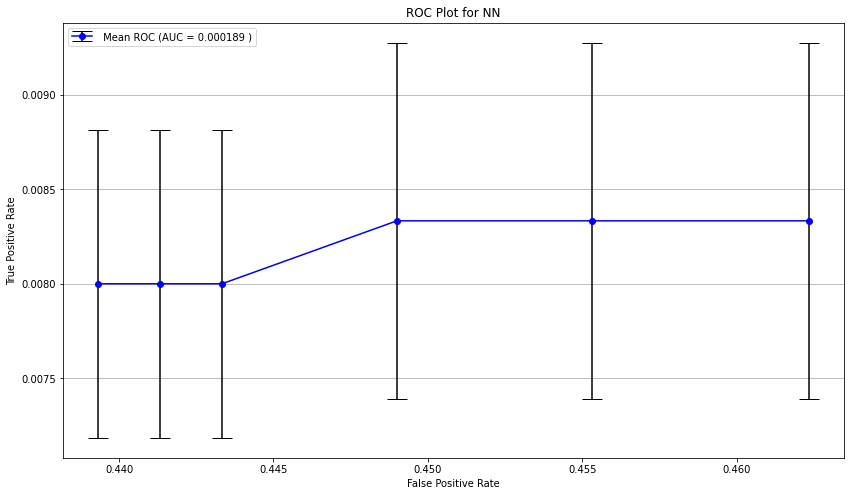

In [ ]:
plt.figure(figsize=(14,8))
plt.errorbar(mean_fpr_nn, mean_tpr_nn,yerr = std_tpr_nn, fmt='-o', color='b', ecolor='black', capsize=10, label=r' Mean ROC (AUC = %0.6f )' % (mean_auc_nn))
# Title
plt.title('ROC Plot for NN')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
plt.grid(axis='y')
# Show plot
plt.show()

In [ ]:
eer_nn, index_eer_nn = eer(mean_tpr_nn, mean_fpr_nn)

In [ ]:
thresholds = [0.2,0.4,0.6,0.8,0.9,0.95]
print("Equal Error Rate in 5-layer Neural Network with threshold : ")
print("EER",'%.4f'%eer_nn)
print("Threshold : ", thresholds[index_eer_nn])

Equal Error Rate in 5-layer Neural Network with threshold : 
EER 0.7270
Threshold :  0.2


# Precision-Recall curve

SVM

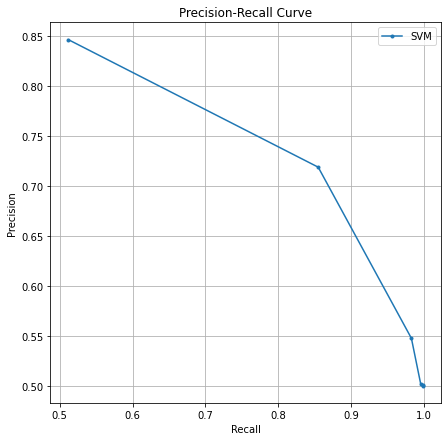

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(mean_rec_svm, mean_prec_svm, marker='.', label='SVM')
# Title
plt.title('Precision-Recall Curve')
# Axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# Show legend
plt.legend() #
plt.grid() 
# Show plot
plt.show()

5-layer Neural Network

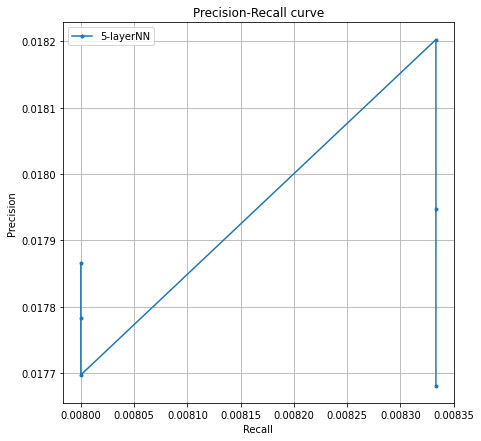

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(mean_rec_nn, mean_prec_nn, marker='.', label='5-layerNN')
# Title
plt.title('Precision-Recall curve')
# Axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# Show legend
plt.legend() #
plt.grid() 
# Show plot
plt.show()